# tgdetect


In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 1703
download_chandra_obsid 1703 evt1
mv -fv 1703/secondary/*fits.gz .
gunzip -f *fits.gz 


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       26 Mb  ####################          < 1 s  97568.1 kb/s

'1703/secondary/acisf01703_000N005_evt1.fits.gz' -> './acisf01703_000N005_evt1.fits.gz'


# Make "bad" src list

In [3]:
punlearn tgdetect
pset tgdetect infile=acisf01703_000N005_evt1.fits
pset tgdetect outfile=acis_src1a.fits
tgdetect mode=h clobber=yes

           trying again w/lower SNR = 40/2 ...



In [4]:
ds9 acisf01703_000N005_evt1.fits -region acis_src1a.fits \
  -scale log -bin factor 1.5 \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png


[1] 44147
[1]+  Done                    ds9 acisf01703_000N005_evt1.fits -region acis_src1a.fits -scale log -bin factor 1.5 -saveimage png ds9_01.png


## Get Coords

In [5]:
ra=`dmkeypar acisf01703_000N005_evt1.fits RA_TARG echo+`
echo $ra

329.716667


In [6]:
dec=`dmkeypar acisf01703_000N005_evt1.fits DEC_TARG echo+`
echo $dec

-30.225556


In [7]:
punlearn dmcoords
dmcoords acisf01703_000N005_evt1.fits celfmt=deg op=cel ra=$ra dec=$dec verb=1
x=`pget dmcoords x`
y=`pget dmcoords y`


----------------------------------------
Spacecraft Configuration:
----------------------------------------
Dataset:           acisf01703_000N005_evt1.fits
Observatory:         
Telescope:        CHANDRA
Grating:          LEG
Instrument:       ACIS
Detector:         ACIS
Chip:             ACIS-S3
SIM position:         -0.683     0.000  -182.134    
SIM offset:            0.000     0.000     0.000   
SIM rotation:          0.000     0.000     0.000   
Grating order: 0
Focal length:     10070.000000
Chip pixel scale: 0.023987 x 0.023987 mm/pixel
Chip size:        1024 x 1024 pixels

----------------------------------------
Sky Coordinate Configuration:
----------------------------------------
Sky coordinate pixel system: FP-1.1
Center pixel of sky plane:  (4096.500000,4096.500000)
Size of sky plane:          8192 x 8192
Sky pixel scale:            0.492000 arcsec/pixel
Nominal:          RA 329.722436 Dec -30.195914 Roll   0.000000
Aspect:           RA 329.722436 Dec -30.195914 Roll  97.

In [8]:
pset tgdetect infile=acisf01703_000N005_evt1.fits
pset tgdetect zo_pos_x=${x}
pset tgdetect zo_pos_y=${y}
pset tgdetect outfile=acis_target_src1a.fits
tgdetect mode=h clobber=yes


[1] 44378
[1]+  Done                    ds9 acisf01703_000N005_evt1.fits -pan to $x $y physical -zoom 4 -scale log -region acis_target_src1a.fits -saveimage png ds9_02.png


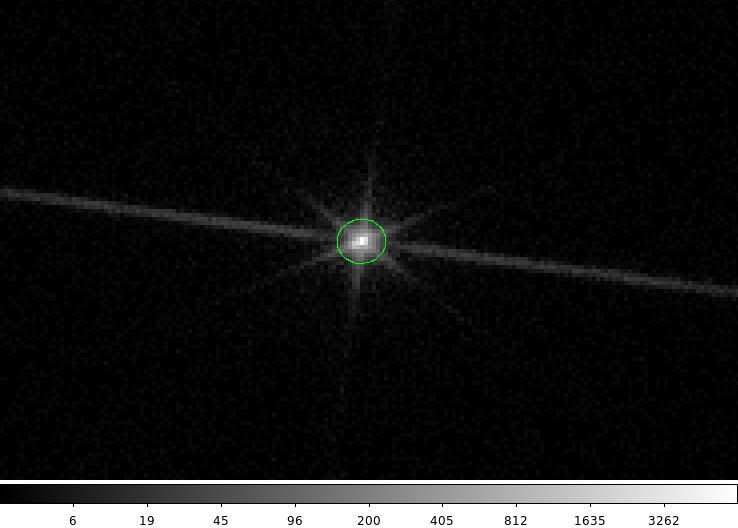

In [9]:
ds9 acisf01703_000N005_evt1.fits \
  -pan to $x $y physical \
  -zoom 4 -scale log \
  -region acis_target_src1a.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

# Cleanup


In [10]:
/bin/rm -rf 1703 
/bin/rm -f acisf*
